# Travel-Time Estimation Model

In [9]:
import pandas as pd
import numpy as np
import tensorflow as tf
from PIL import Image, ImageChops, ImageEnhance
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model

In [10]:
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
import torch
import torch.nn.functional as F

# Data View

In [11]:
wday_off = pd.read_csv('wday_off.csv')
wday_peak = pd.read_csv('wday_peak.csv')
wend_off = pd.read_csv('wend_off.csv')
wend_peak = pd.read_csv('wend_peak.csv')

In [12]:
wday_off

,Link,Node_Start,Longitude_Start,Latitude_Start,Node_End,Longitude_End,Latitude_End,Length,Unnamed: 8,Data1,...,Data41,Data42,Data43,Data44,Data45,Data46,Data47,Data48,Data49,Data50
0,0,0,103.946006,30.750660,16,103.952551,30.756752,921.041014,NaN,89.587892,...,73.957197,88.184778,72.003206,88.184778,73.852526,75.069991,72.673921,77.629445,77.629445,83.310242
1,1,0,103.946006,30.750660,48,103.956494,30.745080,1179.207157,NaN,121.986947,...,113.506571,113.506571,140.895778,142.619070,139.213634,146.195291,132.868412,162.493618,162.493618,209.120481
2,2,0,103.946006,30.750660,64,103.941276,30.754493,620.905375,NaN,41.285580,...,59.448387,59.448387,59.448387,59.448387,44.218780,46.230804,45.202414,43.339978,43.774969,45.202414
3,3,1,104.062539,30.739077,311,104.060024,30.742693,467.552293,NaN,37.796143,...,38.472874,46.950858,50.244426,49.761663,51.894196,60.764919,50.244426,46.755229,32.152593,32.152593
4,4,1,104.062539,30.739077,1288,104.062071,30.732501,730.287581,NaN,60.548947,...,80.810511,80.810511,76.872377,77.360119,76.872377,75.819331,75.222755,75.222755,75.222755,74.794745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5938,5938,1900,104.029570,30.670992,1729,104.031714,30.670676,208.333343,NaN,15.136227,...,18.137848,21.428572,21.783739,20.197487,16.406892,20.856508,26.785715,27.444883,19.788919,19.788919
5939,5939,1901,104.025686,30.626472,1233,104.023241,30.622808,468.731933,NaN,40.644760,...,47.036515,43.083732,48.099051,43.433164,50.507828,49.743827,56.310399,42.064937,40.425000,38.736879
5940,5940,1901,104.025686,30.626472,1565,104.023113,30.627839,289.473210,NaN,50.246073,...,37.986764,39.523523,39.523523,37.986764,37.986764,37.986764,37.986764,37.986764,37.986764,44.496309
5941,5941,1901,104.025686,30.626472,1658,104.028963,30.624882,360.123488,NaN,36.935304,...,49.169831,40.066719,40.262253,40.262253,40.262253,40.262253,40.513892,36.142025,38.186879,38.186879


In [13]:
wday_peak

,Link,Node_Start,Longitude_Start,Latitude_Start,Node_End,Longitude_End,Latitude_End,Length,Unnamed: 8,Data1,...,Data41,Data42,Data43,Data44,Data45,Data46,Data47,Data48,Data49,Data50
0,0,0,103.946006,30.750660,16,103.952551,30.756752,921.041014,NaN,93.401342,...,74.129457,74.119060,74.124259,74.121659,74.122959,74.122309,74.122634,74.122472,74.122553,74.122512
1,1,0,103.946006,30.750660,48,103.956494,30.745080,1179.207157,NaN,151.747838,...,167.600790,167.600853,167.600822,167.600822,167.600822,119.919372,139.806425,129.101529,134.240903,131.621066
2,2,0,103.946006,30.750660,64,103.941276,30.754493,620.905375,NaN,67.420164,...,87.069450,111.902846,96.288095,52.718381,68.133314,59.442741,63.492023,61.400693,62.428849,61.910503
3,3,1,104.062539,30.739077,311,104.060024,30.742693,467.552293,NaN,45.788582,...,101.498789,101.498789,101.498789,101.498789,101.498789,101.498789,101.498789,101.498789,101.498789,101.498789
4,4,1,104.062539,30.739077,1288,104.062071,30.732501,730.287581,NaN,147.692628,...,100.583743,100.579643,100.581693,100.580668,100.581180,100.580924,100.581052,100.580988,100.581020,100.581004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5938,5938,1900,104.029570,30.670992,1729,104.031714,30.670676,208.333343,NaN,52.763821,...,55.705607,39.874337,26.533020,34.653467,33.088237,49.019610,29.128908,51.369865,42.789225,52.050476
5939,5939,1901,104.025686,30.626472,1233,104.023241,30.622808,468.731933,NaN,46.294512,...,60.276729,60.247962,46.632986,57.014459,48.911158,68.353526,67.157295,71.559377,76.311360,79.627289
5940,5940,1901,104.025686,30.626472,1565,104.023113,30.627839,289.473210,NaN,56.052186,...,40.460221,41.194952,38.596428,41.851548,25.890772,45.706296,51.717298,37.030627,45.773216,37.198610
5941,5941,1901,104.025686,30.626472,1658,104.028963,30.624882,360.123488,NaN,90.660458,...,43.607284,43.780314,41.070049,59.704684,45.837757,45.251119,46.915967,46.068507,46.488375,46.277488


In [14]:
wend_off

,Link,Node_Start,Longitude_Start,Latitude_Start,Node_End,Longitude_End,Latitude_End,Length,Unnamed: 8,Data1,...,Data41,Data42,Data43,Data44,Data45,Data46,Data47,Data48,Data49,Data50
0,0,0,103.946006,30.750660,16,103.952551,30.756752,921.041014,NaN,83.310242,...,89.591175,89.588717,89.587489,89.588103,89.587796,89.587872,89.587911,89.587892,89.587901,89.587896
1,1,0,103.946006,30.750660,48,103.956494,30.745080,1179.207157,NaN,209.120481,...,121.986945,121.986947,121.986948,121.986947,121.986947,121.986947,121.986947,121.986947,121.986947,121.986947
2,2,0,103.946006,30.750660,64,103.941276,30.754493,620.905375,NaN,45.202414,...,44.705187,42.095280,40.901361,41.489733,41.193446,41.267120,41.304056,41.285580,41.294816,41.290197
3,3,1,104.062539,30.739077,311,104.060024,30.742693,467.552293,NaN,32.152593,...,37.796143,37.796143,37.796143,37.796143,37.796143,37.796143,37.796143,37.796143,37.796143,37.796143
4,4,1,104.062539,30.739077,1288,104.062071,30.732501,730.287581,NaN,74.794745,...,60.548947,60.548947,60.548947,60.548947,60.548947,60.548947,60.548947,60.548947,60.548947,56.386816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5938,5938,1900,104.029570,30.670992,1729,104.031714,30.670676,208.333343,NaN,19.788919,...,23.148149,16.746485,22.455091,30.906595,18.598035,40.687163,21.047709,15.136227,20.053477,27.154237
5939,5939,1901,104.025686,30.626472,1233,104.023241,30.622808,468.731933,NaN,38.736879,...,51.953344,43.042589,40.722412,87.431863,40.417604,40.393416,39.590819,40.644760,45.598327,42.603589
5940,5940,1901,104.025686,30.626472,1565,104.023113,30.627839,289.473210,NaN,44.496309,...,50.246073,22.638021,50.246073,50.246073,50.246073,50.246073,50.246073,50.246073,51.335151,50.784774
5941,5941,1901,104.025686,30.626472,1658,104.028963,30.624882,360.123488,NaN,38.186879,...,62.509381,37.572658,37.907736,33.199605,32.411114,37.656066,33.306219,36.935304,37.656066,33.314242


In [15]:
wend_peak

,Link,Node_Start,Longitude_Start,Latitude_Start,Node_End,Longitude_End,Latitude_End,Length,Unnamed: 8,Data1,...,Data41,Data42,Data43,Data44,Data45,Data46,Data47,Data48,Data49,Data50
0,0,0,103.946006,30.750660,16,103.952551,30.756752,921.041014,NaN,78.799405,...,339.689653,339.689592,339.689561,339.689576,339.689569,339.689573,339.689572,339.689571,339.689571,339.689571
1,1,0,103.946006,30.750660,48,103.956494,30.745080,1179.207157,NaN,173.981384,...,175.419247,174.638841,174.251237,174.444824,174.347976,174.396387,174.384281,174.378230,174.381255,174.380499
2,2,0,103.946006,30.750660,64,103.941276,30.754493,620.905375,NaN,35.494392,...,44.870178,45.164097,45.312504,45.238179,45.275311,45.256737,45.261379,45.263701,45.261379,41.089326
3,3,1,104.062539,30.739077,311,104.060024,30.742693,467.552293,NaN,51.160737,...,110.212400,110.212400,66.137063,107.896683,107.087237,108.809238,62.805532,174.423654,102.377641,64.489972
4,4,1,104.062539,30.739077,1288,104.062071,30.732501,730.287581,NaN,129.828903,...,139.842303,123.364534,116.500825,119.834478,119.834478,119.834478,115.210311,95.427778,110.929759,122.362015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5938,5938,1900,104.029570,30.670992,1729,104.031714,30.670676,208.333343,NaN,37.267082,...,87.890629,50.223217,51.369865,28.195490,20.818877,58.593753,59.794991,42.313119,28.517112,42.016809
5939,5939,1901,104.025686,30.626472,1233,104.023241,30.622808,468.731933,NaN,58.112267,...,54.190838,56.831938,50.889594,52.108131,53.153443,66.850746,41.083233,60.007819,63.524246,52.711752
5940,5940,1901,104.025686,30.626472,1565,104.023113,30.627839,289.473210,NaN,60.150277,...,45.767261,45.946487,45.946487,60.941728,52.392274,56.344533,55.301601,54.794481,55.046873,54.983557
5941,5941,1901,104.025686,30.626472,1658,104.028963,30.624882,360.123488,NaN,46.356778,...,37.067750,37.815592,39.234184,40.906378,38.484440,31.834120,33.271494,39.960244,53.242076,44.398786


# Calculating the average time

In [16]:
wday_off['avg_time'] = (wday_off.iloc[:,9:].sum(axis = 1) / 50)
wday_peak['avg_time'] = (wday_peak.iloc[:,9:].sum(axis = 1) / 50)
wend_off['avg_time'] = (wend_off.iloc[:,9:].sum(axis = 1) / 50)
wend_peak['avg_time'] = (wend_peak.iloc[:,9:].sum(axis = 1) / 50)

<AxesSubplot:>

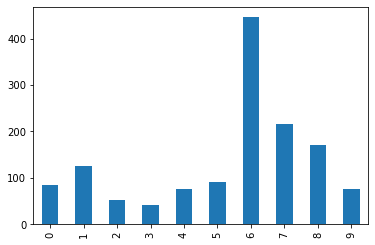

In [17]:
wday_off['avg_time'].head(10).plot(kind='bar')

# Feature vector generation for wday_off

In [18]:
wday_off_data = wday_off.iloc[:,9:-1]

In [19]:
wday_off_data

,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8,Data9,Data10,...,Data41,Data42,Data43,Data44,Data45,Data46,Data47,Data48,Data49,Data50
0,89.587892,89.587911,89.587872,89.587949,89.587796,89.588103,89.587489,89.588717,89.586260,89.591175,...,73.957197,88.184778,72.003206,88.184778,73.852526,75.069991,72.673921,77.629445,77.629445,83.310242
1,121.986947,121.986947,121.986947,121.986947,121.986947,121.986947,121.986948,121.986947,121.986948,121.986945,...,113.506571,113.506571,140.895778,142.619070,139.213634,146.195291,132.868412,162.493618,162.493618,209.120481
2,41.285580,41.304056,41.267120,41.341058,41.193446,41.489733,40.901361,42.095280,39.773298,44.705187,...,59.448387,59.448387,59.448387,59.448387,44.218780,46.230804,45.202414,43.339978,43.774969,45.202414
3,37.796143,37.796143,37.796143,37.796143,37.796143,37.796143,37.796143,37.796143,37.796143,37.796143,...,38.472874,46.950858,50.244426,49.761663,51.894196,60.764919,50.244426,46.755229,32.152593,32.152593
4,60.548947,60.548947,60.548947,60.548947,60.548947,60.548947,60.548947,60.548947,60.548947,60.548947,...,80.810511,80.810511,76.872377,77.360119,76.872377,75.819331,75.222755,75.222755,75.222755,74.794745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5938,15.136227,21.047709,40.687163,18.374817,18.598035,30.906595,22.455091,16.746485,23.017850,23.148149,...,18.137848,21.428572,21.783739,20.197487,16.406892,20.856508,26.785715,27.444883,19.788919,19.788919
5939,40.644760,39.590819,40.393416,40.369257,40.417604,87.431863,40.722412,43.042589,42.322098,51.953344,...,47.036515,43.083732,48.099051,43.433164,50.507828,49.743827,56.310399,42.064937,40.425000,38.736879
5940,50.246073,50.246073,50.246073,50.246073,50.246073,50.246073,50.246073,22.638021,50.246073,50.246073,...,37.986764,39.523523,39.523523,37.986764,37.986764,37.986764,37.986764,37.986764,37.986764,44.496309
5941,36.935304,33.306219,37.656066,43.470737,32.411114,33.199605,37.907736,37.572658,41.753448,62.509381,...,49.169831,40.066719,40.262253,40.262253,40.262253,40.262253,40.513892,36.142025,38.186879,38.186879


In [20]:
np.array(wday_off_data.iloc[0])

array([ 89.58789169,  89.58791089,  89.58787247,  89.58794928,
        89.58779569,  89.58810286,  89.58748852,  89.58871721,
        89.58625985,  89.59117473,  89.58134548,  89.60100616,
        89.56169345,  89.64035338,  89.48317141,  89.79808855,
        89.17045533,  90.4346197 ,  87.94114664,  93.07361825,
        83.34514412, 105.3733363 ,  68.93446258,  68.93446258,
        68.93446258,  76.48783506,  88.18477793,  88.18477793,
        88.18477793,  88.18477793,  88.18477793,  88.18477793,
        88.18477793,  81.64855085,  82.6697939 ,  88.18477793,
        88.18477793,  88.18477793,  88.18477793,  88.18477793,
        73.95719666,  88.18477793,  72.0032063 ,  88.18477793,
        73.85252649,  75.06999066,  72.6739211 ,  77.62944454,
        77.62944454,  83.31024246])

In [21]:
X = np.array(wday_off_data)
timesteps = X.shape[0]
n_features = 50
X = X.reshape(timesteps,1, n_features)

In [22]:
X.shape

(5943, 1, 50)

In [23]:
Xt = X/1000

In [24]:
model = Sequential([
        tf.keras.layers.Dense(48, activation='relu', input_shape=(1,n_features)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16,activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(48, activation='relu'),
        tf.keras.layers.Dense(n_features)
])
model.compile(optimizer='adam', loss='mse')

In [26]:
model.fit(Xt, Xt, epochs=150)
model.save('dense_model.h5')

Epoch 1/150
186/186 [==============================] - 2s 3ms/step - loss: 7.5753e-04
Epoch 2/150
186/186 [==============================] - 0s 2ms/step - loss: 2.6559e-04
Epoch 3/150
186/186 [==============================] - 0s 2ms/step - loss: 2.5597e-04
Epoch 4/150
186/186 [==============================] - 0s 2ms/step - loss: 2.4539e-04
Epoch 5/150
186/186 [==============================] - 0s 2ms/step - loss: 2.2970e-04
Epoch 6/150
186/186 [==============================] - 0s 2ms/step - loss: 2.1398e-04
Epoch 7/150
186/186 [==============================] - 0s 2ms/step - loss: 1.9813e-04
Epoch 8/150
186/186 [==============================] - 0s 2ms/step - loss: 1.9155e-04
Epoch 9/150
186/186 [==============================] - 0s 2ms/step - loss: 1.8646e-04
Epoch 10/150
186/186 [==============================] - 0s 2ms/step - loss: 1.7994e-04
Epoch 11/150
186/186 [==============================] - 0s 2ms/step - loss: 1.7464e-04
Epoch 12/150
186/186 [==============================

186/186 [==============================] - 0s 2ms/step - loss: 1.2461e-04
Epoch 96/150
186/186 [==============================] - 0s 2ms/step - loss: 1.2302e-04
Epoch 97/150
186/186 [==============================] - 0s 2ms/step - loss: 1.2256e-04
Epoch 98/150
186/186 [==============================] - 0s 2ms/step - loss: 1.2224e-04
Epoch 99/150
186/186 [==============================] - 0s 2ms/step - loss: 1.2705e-04
Epoch 100/150
186/186 [==============================] - 0s 2ms/step - loss: 1.2277e-04
Epoch 101/150
186/186 [==============================] - 0s 2ms/step - loss: 1.2203e-04
Epoch 102/150
186/186 [==============================] - 0s 2ms/step - loss: 1.2261e-04
Epoch 103/150
186/186 [==============================] - 0s 2ms/step - loss: 1.2238e-04
Epoch 104/150
186/186 [==============================] - 0s 2ms/step - loss: 1.2175e-04
Epoch 105/150
186/186 [==============================] - 0s 2ms/step - loss: 1.2262e-04
Epoch 106/150
186/186 [===========================

In [28]:
model = load_model('dense_model.h5')

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1, 48)             2448      
                                                                 
 dense_1 (Dense)             (None, 1, 32)             1568      
                                                                 
 dense_2 (Dense)             (None, 1, 16)             528       
                                                                 
 dense_3 (Dense)             (None, 1, 32)             544       
                                                                 
 dense_4 (Dense)             (None, 1, 48)             1584      
                                                                 
 dense_5 (Dense)             (None, 1, 50)             2450      
                                                                 
Total params: 9,122
Trainable params: 9,122
Non-trainabl

In [31]:
layer_outputs=[layer.output for layer in model.layers[:4]]
activation_model=Model(inputs=model.input,outputs=layer_outputs)
activations=activation_model.predict(X)
bottleneck_activation=activations[2]

In [32]:
bottleneck_activation.shape

(5943, 1, 16)

In [33]:
bottleneck_activation

array([[[178.3539  ,   0.      ,   0.      , ..., 199.39273 ,
         158.51881 ,   0.      ]],

       [[252.15654 ,   0.      ,   0.      , ..., 382.49863 ,
         165.61609 ,   0.      ]],

       [[101.59552 ,   0.      ,   0.      , ..., 162.30322 ,
         111.13322 ,   0.      ]],

       ...,

       [[ 87.25399 ,   0.      ,   0.      , ...,  77.3846  ,
          83.05757 ,   0.      ]],

       [[ 92.33122 ,   0.      ,   0.      , ..., 105.48512 ,
          71.472305,   0.      ]],

       [[ 79.84165 ,   0.      ,   0.      , ..., 100.268265,
          22.198778,   0.      ]]], dtype=float32)

In [34]:
# demonstrate reconstruction
yhat = model.predict(Xt, verbose=0)
print('---Predicted---')
print(np.round(yhat*1000,3))
print('---Actual---')
print(np.round(X, 3))

---Predicted---
[[[ 84.94   91.276  88.848 ...  79.276  76.064  83.012]]

 [[115.829 124.194 121.281 ... 175.228 166.555 200.145]]

 [[ 39.823  42.28   40.628 ...  46.576  43.407  43.371]]

 ...

 [[ 44.693  48.542  48.054 ...  40.872  39.263  43.78 ]]

 [[ 36.591  36.856  39.284 ...  43.101  36.424  37.354]]

 [[ 22.935  25.48   29.126 ...  48.416  50.539  71.349]]]
---Actual---
[[[ 89.588  89.588  89.588 ...  77.629  77.629  83.31 ]]

 [[121.987 121.987 121.987 ... 162.494 162.494 209.12 ]]

 [[ 41.286  41.304  41.267 ...  43.34   43.775  45.202]]

 ...

 [[ 50.246  50.246  50.246 ...  37.987  37.987  44.496]]

 [[ 36.935  33.306  37.656 ...  36.142  38.187  38.187]]

 [[ 26.72   26.715  26.982 ...  26.417  73.175  73.175]]]


In [35]:
bottleneck_activation = bottleneck_activation.reshape(-1,16)

In [36]:
feature_vectors = pd.DataFrame(bottleneck_activation,columns=wday_off_data.columns[:16])

In [37]:
feature_vectors

,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8,Data9,Data10,Data11,Data12,Data13,Data14,Data15,Data16
0,178.353897,0.0,0.0,0.0,188.737534,0.0,60.410767,234.839859,0.0,102.610306,113.001755,0.0,268.664703,199.392731,158.518814,0.0
1,252.156540,0.0,0.0,0.0,220.937637,0.0,110.942345,375.201599,0.0,91.779160,167.666351,0.0,342.375916,382.498627,165.616089,0.0
2,101.595520,0.0,0.0,0.0,100.521133,0.0,55.447803,112.724808,0.0,80.101776,86.490204,0.0,165.788208,162.303223,111.133217,0.0
3,85.314400,0.0,0.0,0.0,88.803459,0.0,51.670906,110.150215,0.0,56.138550,84.022102,0.0,108.888252,100.840370,65.606903,0.0
4,137.416122,0.0,0.0,0.0,156.482162,0.0,79.602219,174.155914,0.0,113.698555,125.812592,0.0,230.566910,238.292572,138.944595,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5938,43.909527,0.0,0.0,0.0,45.882835,0.0,12.537026,67.966492,0.0,26.070061,28.348686,0.0,56.706818,52.052296,35.512508,0.0
5939,98.622139,0.0,0.0,0.0,113.470673,0.0,43.915970,123.347763,0.0,66.220276,74.193123,0.0,144.647385,106.770241,79.726624,0.0
5940,87.253990,0.0,0.0,0.0,123.311020,0.0,14.272831,112.762863,0.0,29.377451,59.447685,0.0,142.036407,77.384598,83.057571,0.0
5941,92.331223,0.0,0.0,0.0,117.196709,0.0,37.820721,94.589630,0.0,70.654182,61.547520,0.0,122.489288,105.485123,71.472305,0.0
